In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('Data/Fake News Classifier/data.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


**Data Exploration**

In [3]:
data.shape

(20800, 5)

In [4]:
data['title']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 20800, dtype: object

In [5]:
data['text']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 20800, dtype: object

In [6]:
data['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [7]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
data.dropna(inplace= True)

In [9]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
data.reset_index(inplace=True)

In [11]:
data.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


#### Text cleaning

In [12]:
# removing all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Removing all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Removing all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Applying all the lambda functions wrote previously through .map on the comments column
data['text'] = data['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

#### Removing stop words and stemming the text

In [13]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

#### Splitting the dataframe

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(data['text'], data['label'], test_size=0.30, random_state=40)

##### TF-Idf vectorizedr

In [15]:
# Applying tfidf to the data set
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [16]:
# Feature names of tfidf_vectorizer
print(tfidf_vect.get_feature_names()[-10:])

['zwrocie', 'zwrotu', 'zwyci', 'zxycmwjdxj', 'zyaratgah', 'zygankow', 'zylinderkopfdichtung', 'zynga', 'zytsov', 'zyuganov']


##### Count Vectorizer

In [17]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [18]:
# Feature names of `count_vectorizer` 
print(count_vect.get_feature_names()[0:10])

['aa', 'aaa', 'aaah', 'aaahhh', 'aaajiao', 'aaany', 'aaas', 'aab', 'aabb', 'aac']


### Naive Bayes model

##### TF-Idf vectorized 

In [19]:
model = MultinomialNB().fit(tfidf_train, Y_train) 

In [20]:
pred = model.predict(tfidf_test)                     
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.772


In [23]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, pred)
print(pd.DataFrame(cm))

      0     1
0  3103     8
1  1243  1132


In [24]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
1251 / 5486
Percentage accuracy:  77.19650018228216


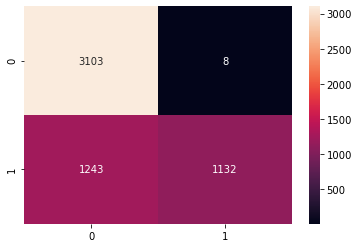

In [25]:
sns.heatmap(cm, annot=True, fmt = 'd');

##### Count Vectorized

In [26]:
#Applying Naive Bayes
model = MultinomialNB().fit(count_train, Y_train)       

In [27]:
pred1 = model.predict(count_test)                    
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)

accuracy:   0.903


In [29]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, pred1)
print(pd.DataFrame(cm))

      0     1
0  2977   134
1   397  1978


In [30]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
531 / 5486
Percentage accuracy:  90.32081662413415


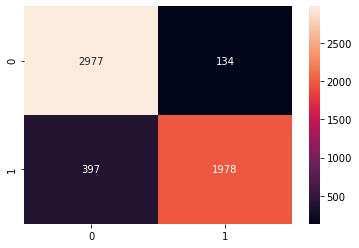

In [31]:
sns.heatmap(cm, annot=True, fmt = 'd');

### Random Forest Model

##### TF-Idf Vectorized

In [32]:
model = RandomForestClassifier().fit(tfidf_train,Y_train)

In [33]:
train_preds2 = model.predict(tfidf_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))
test_preds2 = model.predict(tfidf_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))

Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.913598250091141
--------------------------------------------------


In [35]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, test_preds2)
print(pd.DataFrame(cm))

      0     1
0  3043    68
1   406  1969


In [36]:
# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))

474 / 5486
--------------------------------------------------


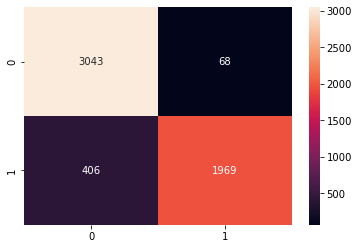

In [37]:
sns.heatmap(cm, annot=True, fmt = 'd');

##### Count Vectorized

In [38]:
model = RandomForestClassifier().fit(count_train,Y_train)

In [41]:
train_preds3 = model.predict(count_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))
test_preds3 = model.predict(count_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))

Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.9013853445133067


In [44]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, test_preds3)
print(pd.DataFrame(cm))

      0     1
0  3046    65
1   476  1899


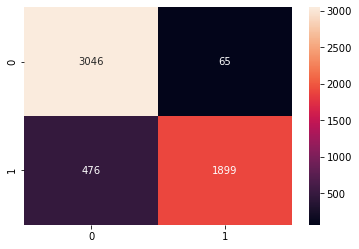

In [45]:
sns.heatmap(cm, annot=True, fmt = 'd');

# K-Nearest Neighbour

##### TF-Idf Vectorized

In [46]:
model = KNeighborsClassifier().fit(tfidf_train,Y_train)

In [47]:
train_preds4 = model.predict(tfidf_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))
test_preds4 = model.predict(tfidf_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))

Model accuracy on train is:  0.5187123994062036
Model accuracy on test is:  0.48651111921254103
--------------------------------------------------


In [48]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, test_preds4)
print(pd.DataFrame(cm))

     0     1
0  304  2807
1   10  2365


In [49]:
# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

2817 / 5486


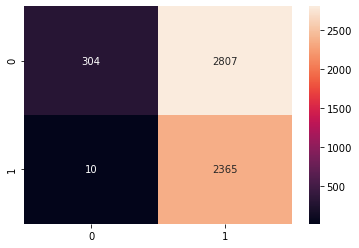

In [50]:
sns.heatmap(cm, annot=True, fmt = 'd');

##### Count Vectorized

In [51]:
model = KNeighborsClassifier().fit(count_train,Y_train)

In [52]:
train_preds5 = model.predict(count_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))
test_preds5 = model.predict(count_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))

Model accuracy on train is:  0.7850613329166342
Model accuracy on test is:  0.7320452059788553


In [53]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, test_preds5)
print(pd.DataFrame(cm))

      0     1
0  1770  1341
1   129  2246


In [54]:
# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

1470 / 5486
--------------------------------------------------


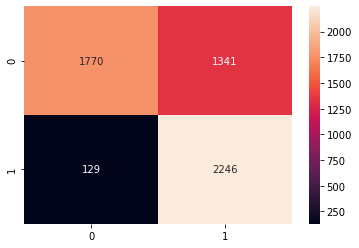

In [55]:
sns.heatmap(cm, annot=True, fmt = 'd');